In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
df = read_csv(
    'https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv')
df


── Column specification ────────────────────────────────────────────────────────
cols(
  year = col_double(),
  imdb = col_character(),
  title = col_character(),
  test = col_character(),
  clean_test = col_character(),
  binary = col_character(),
  budget = col_double(),
  domgross = col_character(),
  intgross = col_character(),
  code = col_character(),
  `budget_2013$` = col_double(),
  `domgross_2013$` = col_character(),
  `intgross_2013$` = col_character(),
  `period code` = col_double(),
  `decade code` = col_double()
)




year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,1.30e+07,25682380,42195766,2013FAIL,13000000,25682380,42195766,1,1
2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,4.50e+07,13414714,40868994,2012PASS,45658735,13611086,41467257,1,1
2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,2.00e+07,53107035,158607035,2013FAIL,20000000,53107035,158607035,1,1
2013,tt1272878,2 Guns,notalk,notalk,FAIL,6.10e+07,75612460,132493015,2013FAIL,61000000,75612460,132493015,1,1
2013,tt0453562,42,men,men,FAIL,4.00e+07,95020213,95020213,2013FAIL,40000000,95020213,95020213,1,1
2013,tt1335975,47 Ronin,men,men,FAIL,2.25e+08,38362475,145803842,2013FAIL,225000000,38362475,145803842,1,1
2013,tt1606378,A Good Day to Die Hard,notalk,notalk,FAIL,9.20e+07,67349198,304249198,2013FAIL,92000000,67349198,304249198,1,1
2013,tt2194499,About Time,ok-disagree,ok,PASS,1.20e+07,15323921,87324746,2013PASS,12000000,15323921,87324746,1,1
2013,tt1814621,Admission,ok,ok,PASS,1.30e+07,18007317,18007317,2013PASS,13000000,18007317,18007317,1,1


In [12]:
clean = df%>%
select(year, title, clean_test, binary, budget, domgross, intgross, `domgross_2013$`, `intgross_2013$`) %>%
mutate(newdom = `domgross_2013$`, newint = `intgross_2013$`)%>%
arrange(year)
clean

year,title,clean_test,binary,budget,domgross,intgross,domgross_2013$,intgross_2013$,newdom,newint
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1970,Beyond the Valley of the Dolls,ok,PASS,1000000,9000000,9000000,53978683,53978683,53978683,53978683
1971,Escape from the Planet of the Apes,notalk,FAIL,2500000,12300000,12300000,70780525,70780525,70780525,70780525
1971,Shaft,notalk,FAIL,53012938,70327868,107190108,404702718,616827003,404702718,616827003
1971,Straw Dogs,notalk,FAIL,25000000,10324441,11253821,59412143,64760273,59412143,64760273
1971,The French Connection,notalk,FAIL,2200000,41158757,41158757,236848653,236848653,236848653,236848653
1971,Willy Wonka &amp; the Chocolate Factory,men,FAIL,3000000,4000000,4000000,23018057,23018057,23018057,23018057
1972,1776,notalk,FAIL,4000000,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A
1972,Pink Flamingos,ok,PASS,12000,413802,413802,2305762,2305762,2305762,2305762
1972,The Godfather,notalk,FAIL,7000000,134966411,268500000,752051643,1496119403,752051643,1496119403


In [13]:
pass = clean %>%
filter(binary == "PASS")%>%
group_by(year)%>%
mutate(films = n())
pass

year,title,clean_test,binary,budget,domgross,intgross,domgross_2013$,intgross_2013$,newdom,newint,films
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1970,Beyond the Valley of the Dolls,ok,PASS,1000000,9000000,9000000,53978683,53978683,53978683,53978683,1
1972,Pink Flamingos,ok,PASS,12000,413802,413802,2305762,2305762,2305762,2305762,1
1973,The Exorcist,ok,PASS,12000000,204868002,402735134,1074306128,2111900435,1074306128,2111900435,1
1974,Black Christmas,ok,PASS,9000000,16235738,16235738,76693179,76693179,76693179,76693179,2
1974,The Godfather: Part II,ok,PASS,13000000,57300000,57300000,270669505,270669505,270669505,270669505,2
1976,Family Plot,ok,PASS,3000000,13200000,13200000,54012120,54012120,54012120,54012120,3
1976,Network,ok,PASS,3800000,23689877,23689877,96934884,96934884,96934884,96934884,3
1976,Sparkle,ok,PASS,10000000,24397469,24660323,99830228,100905781,99830228,100905781,3
1977,Annie Hall,ok,PASS,4000000,38251425,38251425,147005823,147005823,147005823,147005823,2


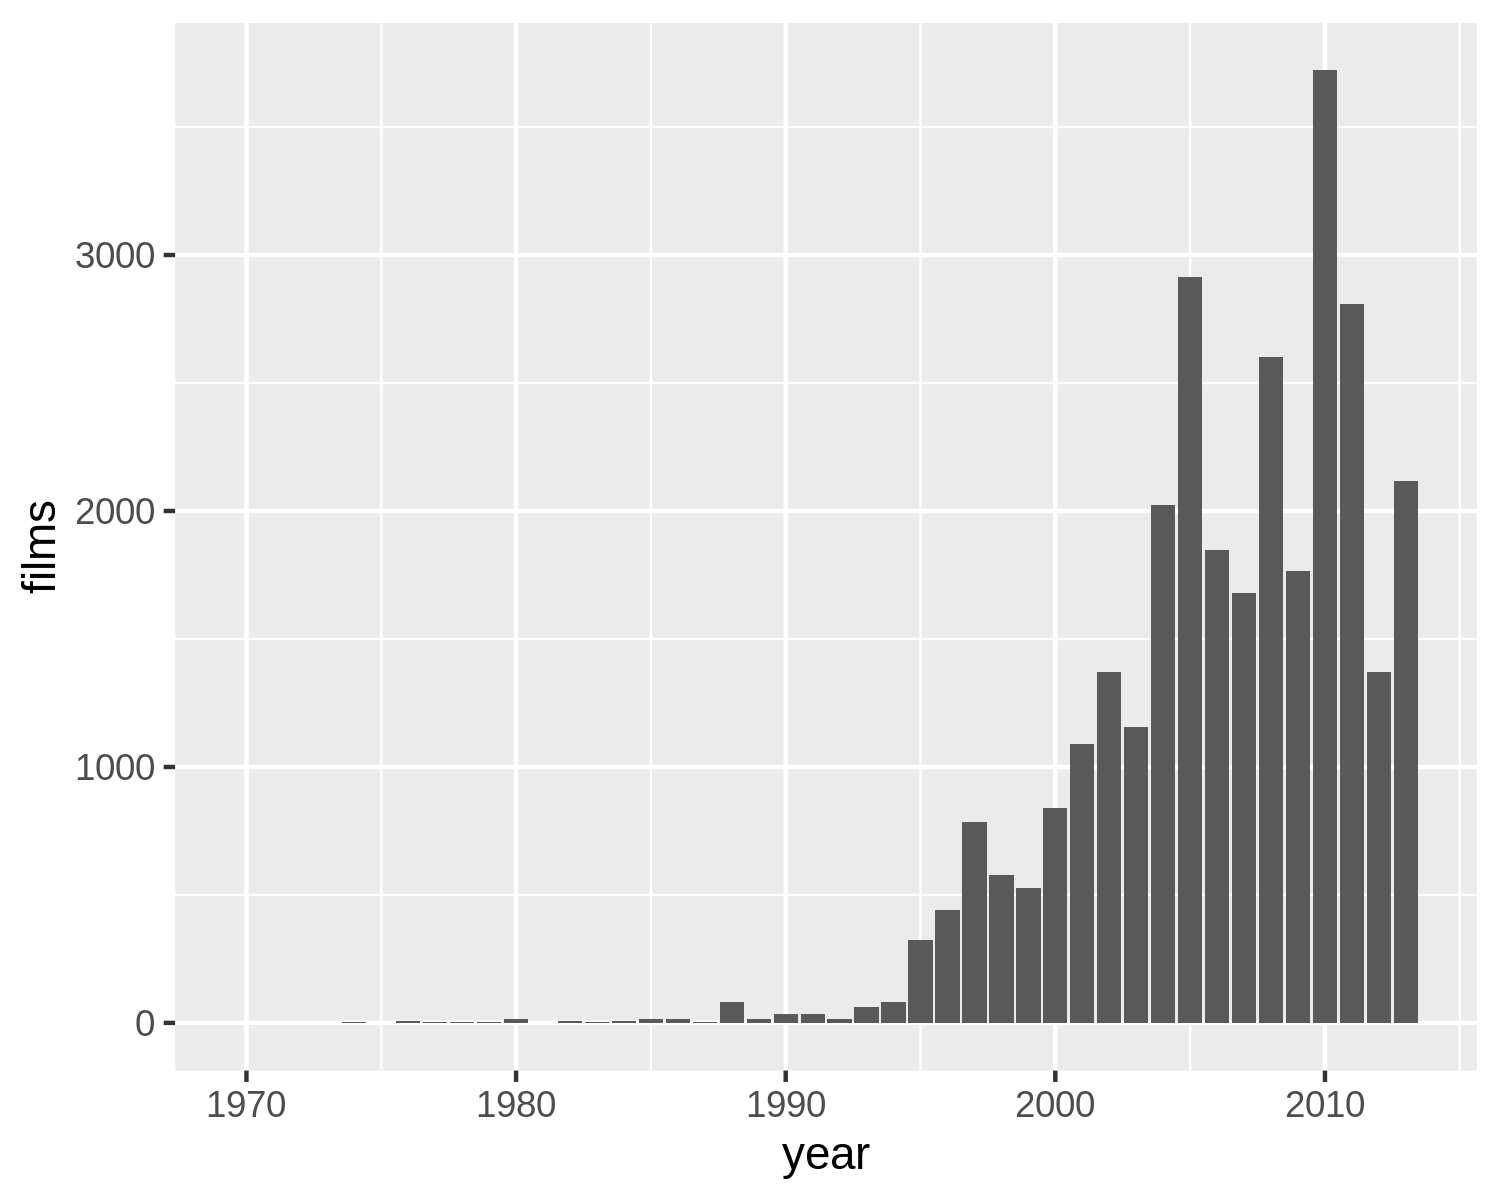

In [14]:
p = ggplot(pass, aes(x = year, y = films))

p = p + geom_col()

p

In [15]:
new = clean %>%
#filter(binary == "PASS")%>%
filter(!grepl('#N/A', newint))%>%
filter(!grepl('#N/A', newdom))%>%
group_by(year)%>%
mutate(films = n())%>%
mutate(newdom = as.numeric(newdom)) %>%
mutate(newint = as.numeric(newint))%>%
mutate(wwgross = newdom + newint)
new

year,title,clean_test,binary,budget,domgross,intgross,domgross_2013$,intgross_2013$,newdom,newint,films,wwgross
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1970,Beyond the Valley of the Dolls,ok,PASS,1000000,9000000,9000000,53978683,53978683,53978683,53978683,1,107957366
1971,Escape from the Planet of the Apes,notalk,FAIL,2500000,12300000,12300000,70780525,70780525,70780525,70780525,5,141561050
1971,Shaft,notalk,FAIL,53012938,70327868,107190108,404702718,616827003,404702718,616827003,5,1021529721
1971,Straw Dogs,notalk,FAIL,25000000,10324441,11253821,59412143,64760273,59412143,64760273,5,124172416
1971,The French Connection,notalk,FAIL,2200000,41158757,41158757,236848653,236848653,236848653,236848653,5,473697306
1971,Willy Wonka &amp; the Chocolate Factory,men,FAIL,3000000,4000000,4000000,23018057,23018057,23018057,23018057,5,46036114
1972,Pink Flamingos,ok,PASS,12000,413802,413802,2305762,2305762,2305762,2305762,2,4611524
1972,The Godfather,notalk,FAIL,7000000,134966411,268500000,752051643,1496119403,752051643,1496119403,2,2248171046
1973,American Graffiti,men,FAIL,777000,115000000,140000000,603047833,734145189,603047833,734145189,5,1337193022


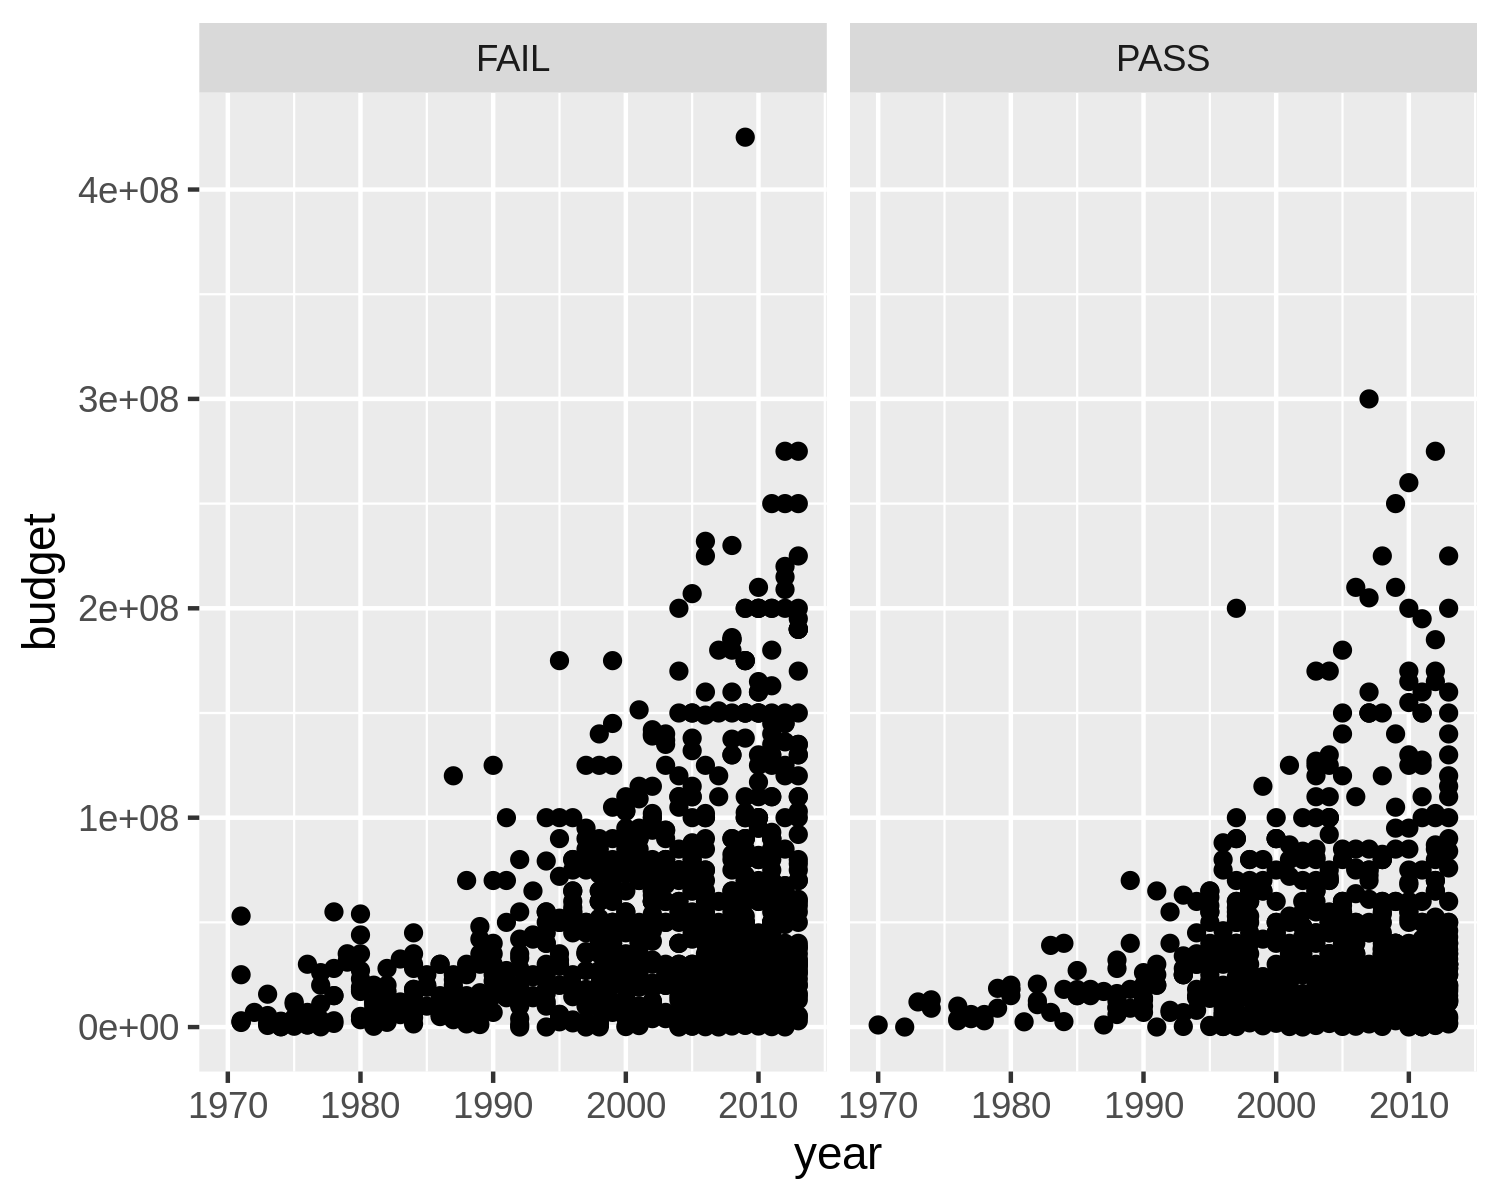

In [17]:
p = ggplot(new, aes(x = year, y = budget))

p = p + geom_point()

p = p + facet_wrap(~binary)

p